1. Evaluate e−5 using two approaches:

>CodeCogsEqn.svg

and

>CodeCogsEqn (1).svg

and compare with the true value of CodeCogsEqn (2).svg. Use 20 terms to evaluate each series and compute true and approximate relative errors as terms are added. Write a program to determine your result.




Calculation using the first way : 
Iteration       Approximation                 E_a                 E_t
        0        1.0000000000        1.0000000000     -147.4131591026
        1       -4.0000000000        1.2500000000      594.6526364103
        2        8.5000000000        1.4705882353    -1260.5118523719
        3      -12.3333333333        1.6891891892     1831.4289622651
        4       13.7083333333        1.8996960486    -2033.4970560312
        5      -12.3333333333        2.1114864865     1831.4289622651
        6        9.3680555556        2.3165307635    -1389.3427196484
        7       -6.1329365079        2.5274991912      911.2084817184
        8        3.5551835317        2.7250688897     -526.6360191359
        9       -1.8271053792        2.9458010316      272.1664813387
       10        0.8640390763        3.1146096622     -127.2347688986
       11       -0.3592084035        3.4053977243       54.3112539365
       12        0.1504780464        3.3871150113      

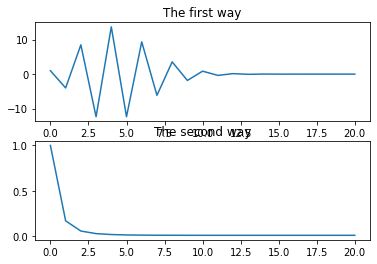

In [1]:
import math
import numpy
import matplotlib.pyplot as p


real_value = numpy.exp(-5)
l1 = []
l2 = []
def first_way(x, term) :
    result = 0
    prev_result = 0
    e_t = 0
    e_a = 0
    print("Calculation using the first way : ")
    print("%s%20s%20s%20s" % ("Iteration", "Approximation", "E_a", "E_t"))
    for n in range(0, term) : 
        prev_result = result #calculate the value
        result += math.pow(-x, n) / math.factorial(n) #formular of the first way
        l1.append(result)

        e_t = ((real_value - result) / real_value) # calculate true error
        e_a = ((result - prev_result) / result)  # calculate approximate relative error

        print("%9d%20.10f%20.10f%20.10f" % (n, result, e_a, e_t))


# Seconfd way
def second_way(x, term) :
    result = 0
    prev_result = 0
    e_t = 0
    e_a = 0
    print("Calculation using the second way : ")
    print("%s%20s%20s%20s" % ("Iteration", "Approximation", "E_a", "E_t"))
    for n in range(0, term) : 
        prev_result = result #calculate the value
        if result != 0:
            flip_result = 1 / result
        else:
            flip_result = 0
        flip_result += (math.pow(x, n) / math.factorial(n))
        result = 1/ flip_result
        l2.append(result)
        e_t = ((real_value - result) / real_value) # calculate true error
        e_a = ((result - prev_result) / result)  # calculate approximate relative error

        print("%9d%20.10f%20.10f%20.10f" % (n, result, e_a, e_t))


first_way(5,21)
print("\n")
second_way(5,21)
fig = p.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(l1)

ax2.plot(l2)

ax1.title.set_text("The first way")
ax2.title.set_text("The second way")
p.show()

2. Determine the number of terms necessary to approximate cos(x) to 8 significant figures using the Maclaurin series approximation

>CodeCogsEqn (3).svg

Calculate the approximation using a value of CodeCogsEqn (7).svg . Write a program to determine your result.

Iteration       Approximation
        0        1.0000000000
        1        0.5558678020
        2        0.5887433702
        3        0.5877699636
        4        0.5877854037
        5        0.5877852513
        6        0.5877852523


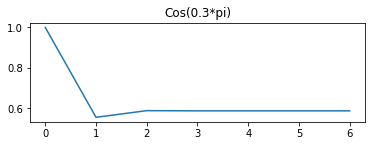

In [3]:
import math
import numpy
import matplotlib.pyplot as p

l1 = []
def calculate_cos(x):
    result=0
    prev_result=1
    i=0
    print("%s%20s" % ("Iteration", "Approximation"))
    while round(prev_result,8)!=round(result,8):
        prev_result=result
        result+=math.pow(-1,i)*math.pow(x,2*i)/math.factorial(2*i)
        l1.append(result)
        print("%9d%20.10f" % (i, result))
        i+=1

calculate_cos(0.3*math.pi)
fig = p.figure()
ax1 = fig.add_subplot(211)

ax1.plot(l1)

ax1.title.set_text("Cos(0.3*pi)")
p.show()

3. Comparison of the exact value of the function CodeCogsEqn (5).svg with the first-order Taylor series approximation. Both the function and the approximation are evaluated at 0.5, where CodeCogsEqn (6).svg. Write a program to determine your result.

In [6]:
import math

x=0.5
x0=1.0
exact_value=math.pow(x,4)*math.exp(-3*math.pow(x,2))
approximate_value=math.exp(-3)+(4*math.exp(-3)-6*math.exp(-3))*(x-x0)
print("The exact value of the function: \t%10.10f" % exact_value)
print("The approximate value of the function: \t%10.10f" % approximate_value)
print("Comparision: \t%10.10f" % (exact_value-approximate_value))

The exact value of the function: 	0.0295229095
The approximate value of the function: 	0.0995741367
Comparision: 	-0.0700512272


4. Use zero- through fourth-order Taylor series expansions to approximate the function:

 CodeCogsEqn (4).svg
 
 Write a program to calculate truncation errors.

In [7]:
import math

#đạo hàm bậc n của f(x)
def Derivative(x,n):
    return math.pow(-1,n)*math.factorial(n+1)*math.pow(x,-(n+2))

def Taylor(x,base):
    print("%5s%20s" % ("Order", "Taylor Series"))
    result=0
    for i in range(5):
        result+=Derivative(base,i)*math.pow(x-base,i)/math.factorial(i)
        print("%5d%20.10f" % (i, result))
    return result

x=int(input("Enter x: "))
if x>0:
    trunc_error=math.fabs(Taylor(x,x+1)-Derivative(x,0))
else:
    trunc_error=math.fabs(Taylor(x,x-1)-Derivative(x,0))
print("\nTruncation errors: %.10f" % trunc_error)

Enter x: 2
Order       Taylor Series
    0        0.1111111111
    1        0.1851851852
    2        0.2222222222
    3        0.2386831276
    4        0.2455418381

Truncation errors: 0.0044581619
